
# <center>Regresi Linear Sederhana</center>
---

#### Tentang Notebook
Dalam notebook ini, akan dipelajari cara menggunakan scikit-learn untuk mengimplementasikan regresi linier sederhana. Data yang dipakai adalah kumpulan data yang terkait dengan ukuran mesin dan emisi karbon dioksida mobil. Kemudian, data dibagi menjadi data pelatihan dan data pengujian, kemudian pembuatan model menggunakan dataset pelatihan, evaluasi model menggunakan dataset pengujian, dan akhirnya penggunaan model untuk memprediksi nilai yang tidak diketahui


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Memahami Data
---

#### FuelConsumptionCo2.csv:
Dataset **FuelConsumptionCo2.csv** yang diunduh mengandung model spesifik untuk rating konsumsi bahan bakar (fuel consumption) dan estimasi emisi karbon dioksida untuk kendaraan ringan yang dijual di Kanada.
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182   --> low --> 0

In [2]:
df = pd.read_csv("heart.csv")

# melihat dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Eksplorasi Data
---

In [3]:
# merangkum data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [4]:
cdf = df[['age','sex','cp','trtbps']]
cdf.head(10)

,age,sex,cp,trtbps
0,63,1,3,145
1,37,1,2,130
2,41,0,1,130
3,56,1,1,120
4,57,0,0,120
5,57,1,0,140
6,56,0,1,140
7,44,1,1,120
8,52,1,2,172
9,57,1,2,150


Fitur-fitur tersebut dapat diplot sebagai berikut:

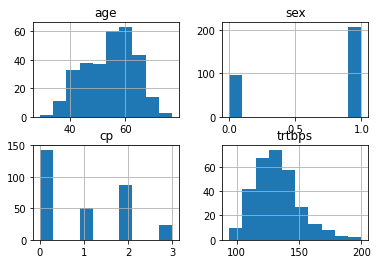

In [5]:
viz = cdf[['age','sex','cp','trtbps']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

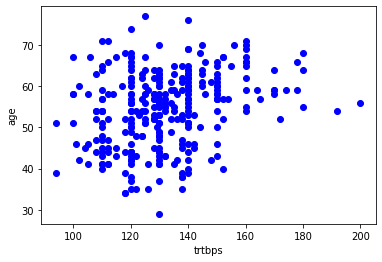

In [8]:
plt.scatter(cdf.trtbps, cdf.age,  color='blue')
plt.xlabel("trtbps")
plt.ylabel("age")
plt.show()

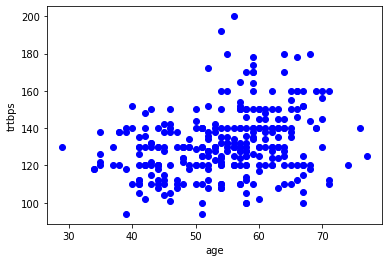

In [11]:
plt.scatter(cdf.age, cdf.trtbps,  color='blue')
plt.xlabel("age")
plt.ylabel("trtbps")
plt.show()

### Praktik
plot __CYLINDER__ vs **EMISSIONS**, untuk melihat hubungan linearnya:

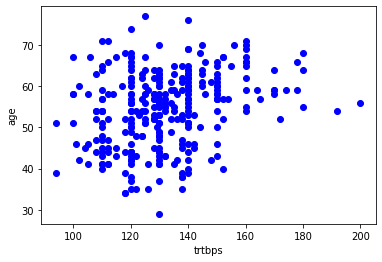

In [12]:
# write your code here
plt.scatter(cdf.trtbps, cdf.age, color='blue')
plt.xlabel("trtbps")
plt.ylabel("age")
plt.show()

#### Pembuatan dataset pelatihan dan pengujian
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.



In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Model Regresi Sederhana
---
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat sisa (residu)' antara x bebas dalam kumpulan data, dan y tak bebas dengan pendekatan linier.

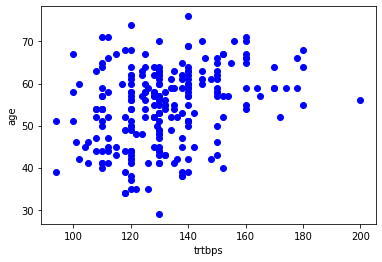

In [14]:
plt.scatter(train.trtbps, train.age,  color='blue')
plt.xlabel("trtbps")
plt.ylabel("age")
plt.show()

#### Pemodelan
Menggunakan sklearn package untuk memodelkan data.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['trtbps']])
train_y = np.asanyarray(train[['age']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.15753079]]
Intercept:  [33.69450952]


Seperti disebutkan sebelumnya, __koefisien__ dan __intercept__ dalam regresi linier sederhana, adalah parameter dari garis yang cocok dengan data.
Mengingat bahwa ini adalah regresi linier sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameternya adalah intercept dan kemiringan atau gradien garis (koefisien), sklearn dapat memperkirakannya langsung dari data.
Perhatikan bahwa semua data harus tersedia untuk menghitung parameter.


#### Plot output model

Plotting garis yang mencocoki terhadap data:

Text(0, 0.5, 'age')

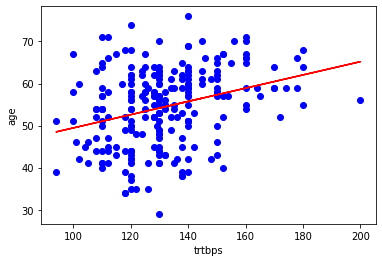

In [16]:
plt.scatter(train.trtbps, train.age,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("trtbps")
plt.ylabel("age")

#### Evaluasi
Nilai aktual dan nilai prediksi dapat dibandingkan untuk menghitung akurasi dari model regresi. Metrik evaluasi sangat penting untuk pengembangan model karena memberikan pengetahuan untuk perbaikan model.

Ada berbagai metrik untuk evaluasi model, misalnya MSE sebagai error untuk mengetahui akurasi dari model yang dibangun yang dihitung dari MSE model terhadap data pengujian: 
- Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
- Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
- Root Mean Squared Error (RMSE).
- R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.


In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['trtbps']])
test_y = np.asanyarray(test[['age']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 6.96
Residual sum of squares (MSE): 76.96
R2-score: -10.53
